<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/media_pipe_from_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytube
!pip install -q mediapipe==0.10.0
!pip install utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 31.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement exercise_utils (from versions: none)
ERROR: No matching distribution found for exercise_utils
ERROR: Could not find a version that satisfies the requirement drawing_utils (from versions: none)
ERROR: No matching distribution found for drawing_utils


In [22]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import subprocess
from pytube import YouTube
plt.style.use('ggplot')
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def downloadYouTube(videourl, path):

    yt = YouTube(videourl)
    yt = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
    if not os.path.exists(path):
        os.makedirs(path)
    yt.download(path)

downloadYouTube('https://www.youtube.com/watch?v=RTK_BztAwAY', os.getcwd())

In [ ]:
!ls -GFlash --color

total 4.5M
4.0K drwxr-xr-x 1 root 4.0K Sep 22 13:13  ./
4.0K drwxr-xr-x 1 root 4.0K Sep 22 13:11  ../
4.0K drwxr-xr-x 4 root 4.0K Sep 20 13:24  .config/
4.5M -rw-r--r-- 1 root 4.5M Sep 22 13:13 'Learn Indian Sign Language - lesson 4 (Emotions).mp4'
4.0K drwxr-xr-x 1 root 4.0K Sep 20 13:25  sample_data/


In [ ]:
'''
from IPython.display import Video
Video("/content/Funny_Hampter.mp4", width=700)
'''

'\nfrom IPython.display import Video\nVideo("/content/Funny_Hampter.mp4", width=700)\n'

In [ ]:
# Load in video capture
cap = cv2.VideoCapture('/content/Learn_Indian_Sign_Language.mp4')

In [ ]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

844.0

In [ ]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [ ]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 29.97


In [ ]:
cap.release()

In [ ]:
cap = cv2.VideoCapture('/content/Learn_Indian_Sign_Language.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (720, 1280, 3)


In [ ]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

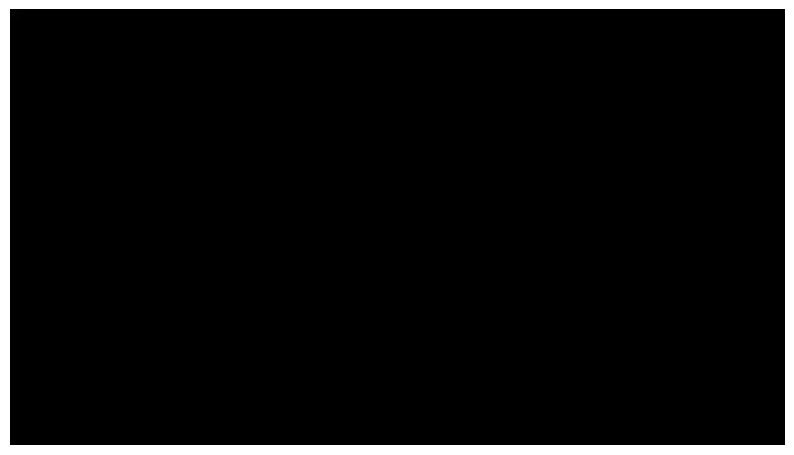

In [ ]:
display_cv2_img(img)

In [26]:
# Initialize mediapipe pose class.
mp_pose = solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = solutions.drawing_utils

In [40]:
def detectPose(image_pose, pose, draw=False, display=False):

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)

    if resultant.pose_landmarks and draw:

        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=3, circle_radius=1),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=1))

    if display:

        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
        plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');
        plt.tight_layout()
        plt.show(block = False)
    else:

        return original_image, results


In [34]:
'''
image = cv2.imread("asl_pose.jpg")
detectPose(image, pose_image, draw=True, display=True)
#cv2_imshow(image)
'''

'\nimage = cv2.imread("asl_pose.jpg")\ndetectPose(image, pose_image, draw=True, display=True)\n#cv2_imshow(image)\n'

In [ ]:
cap.release()

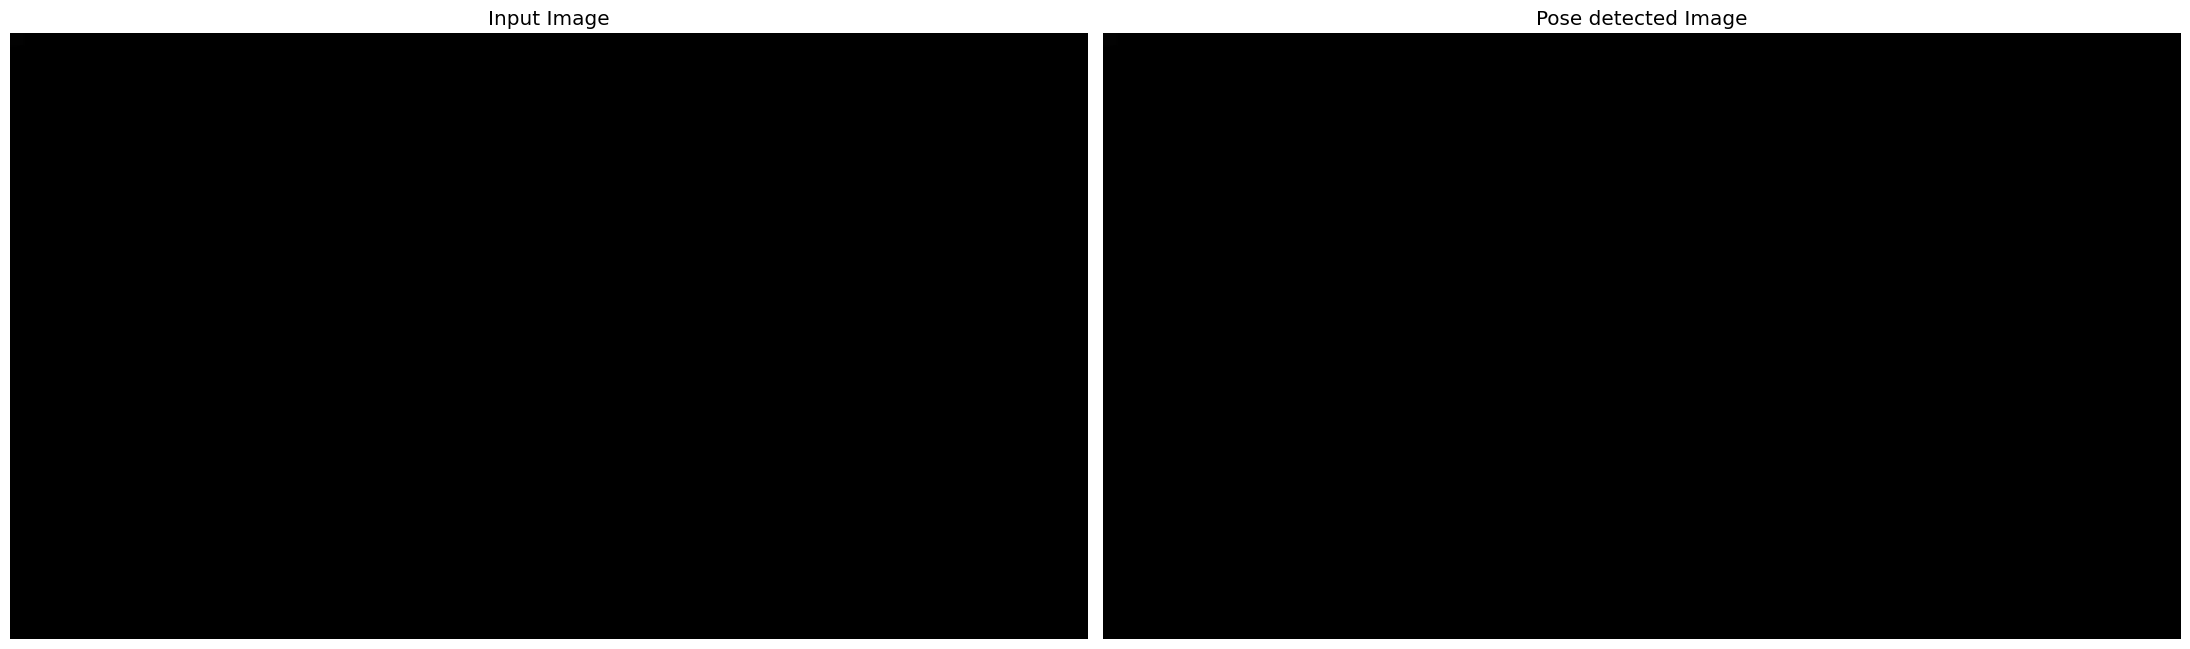

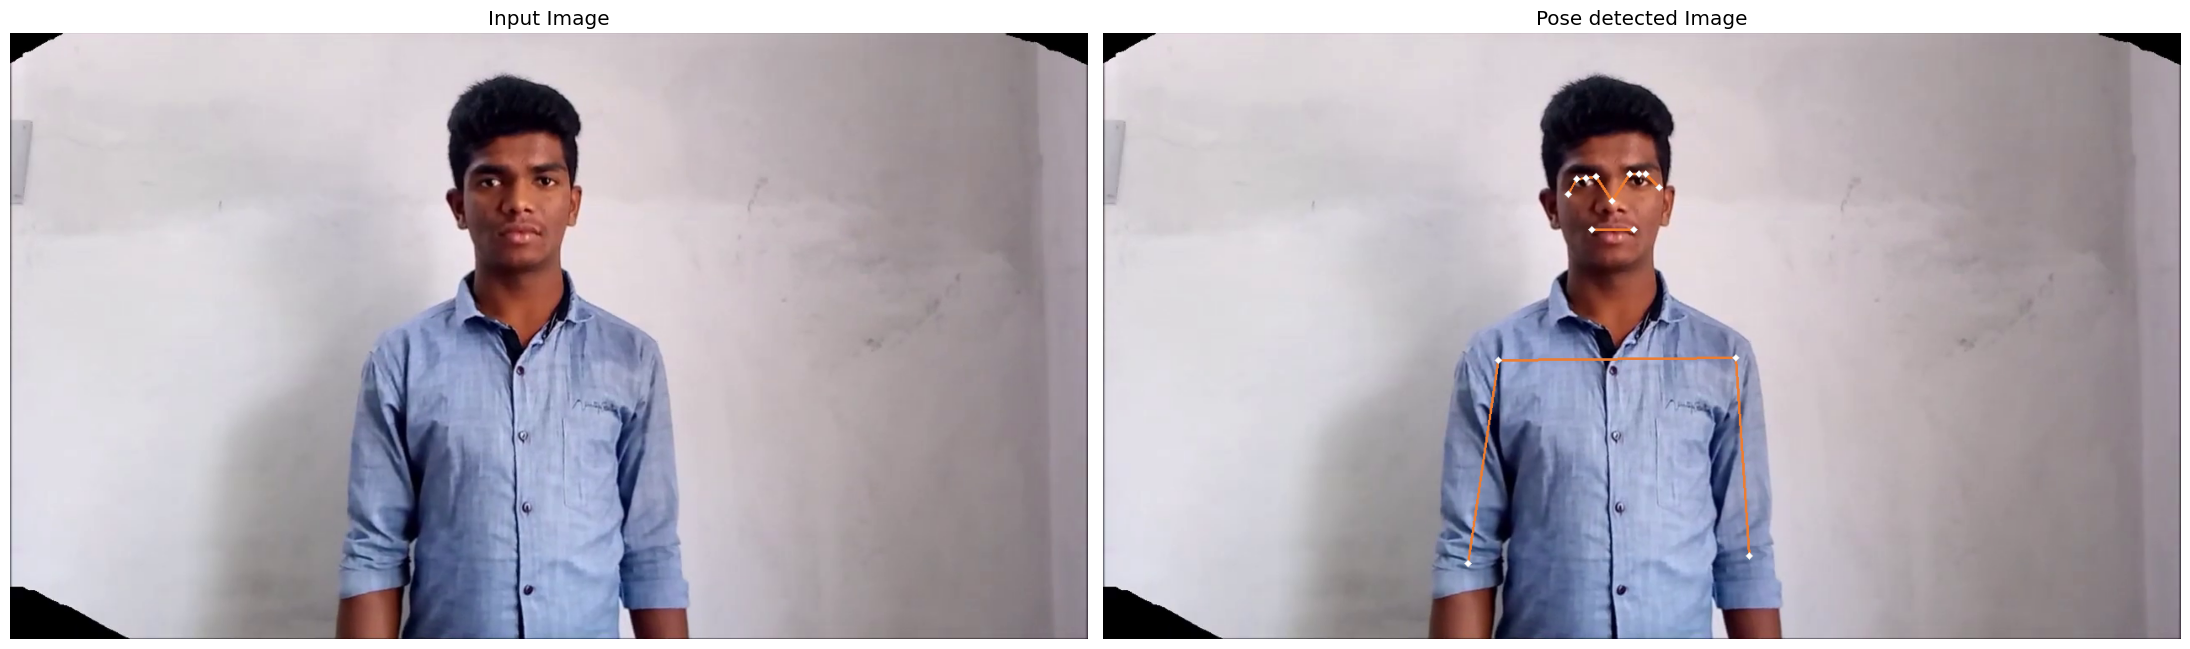

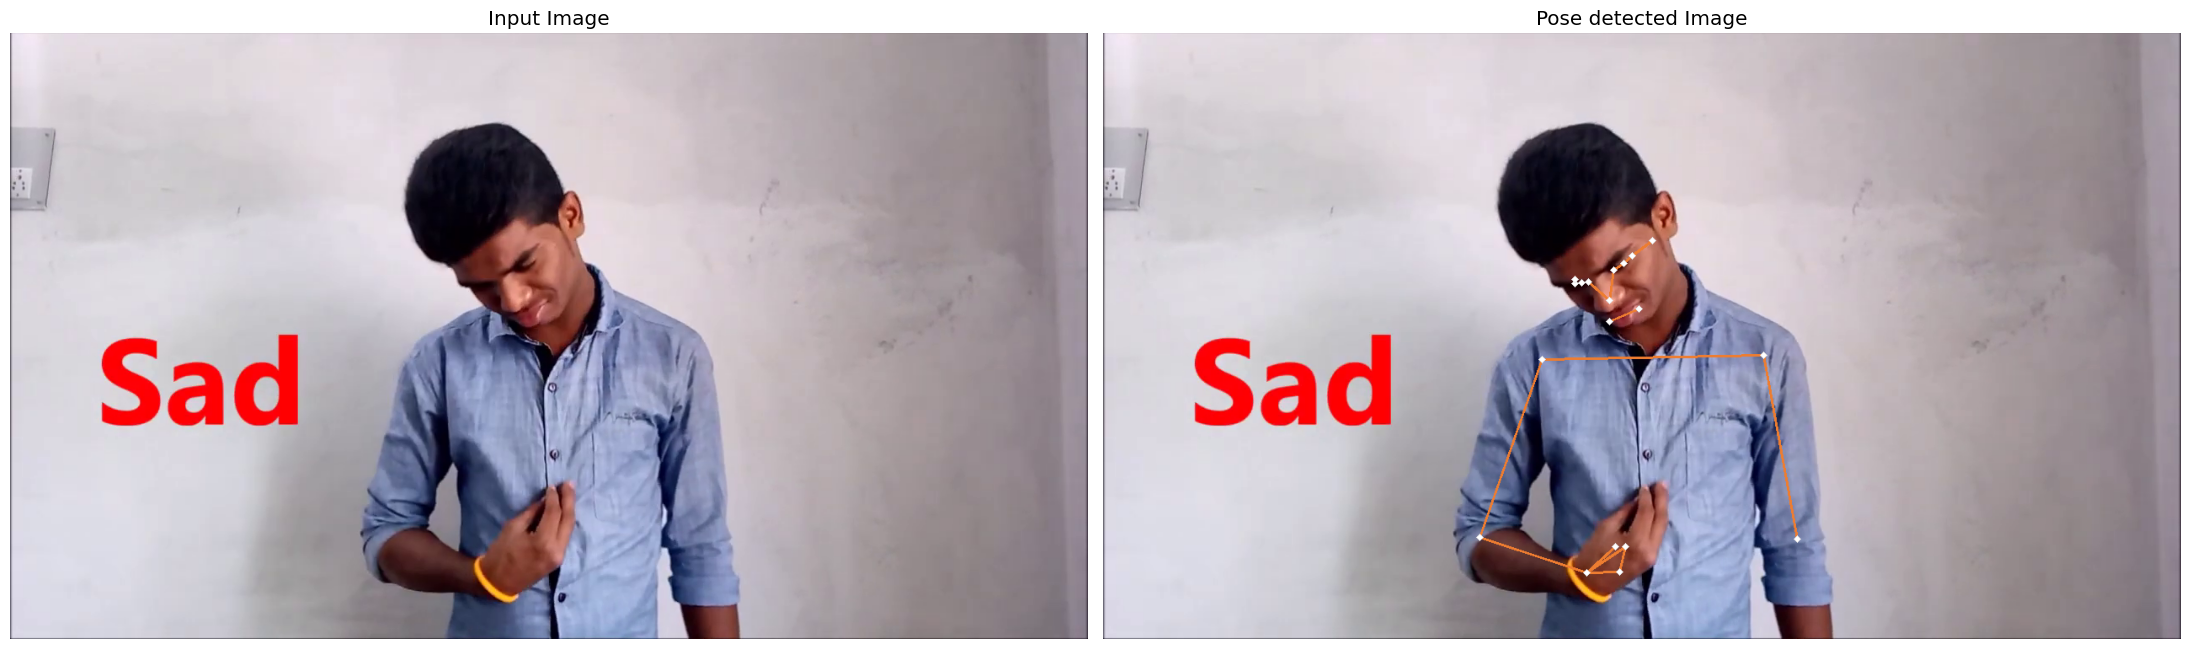

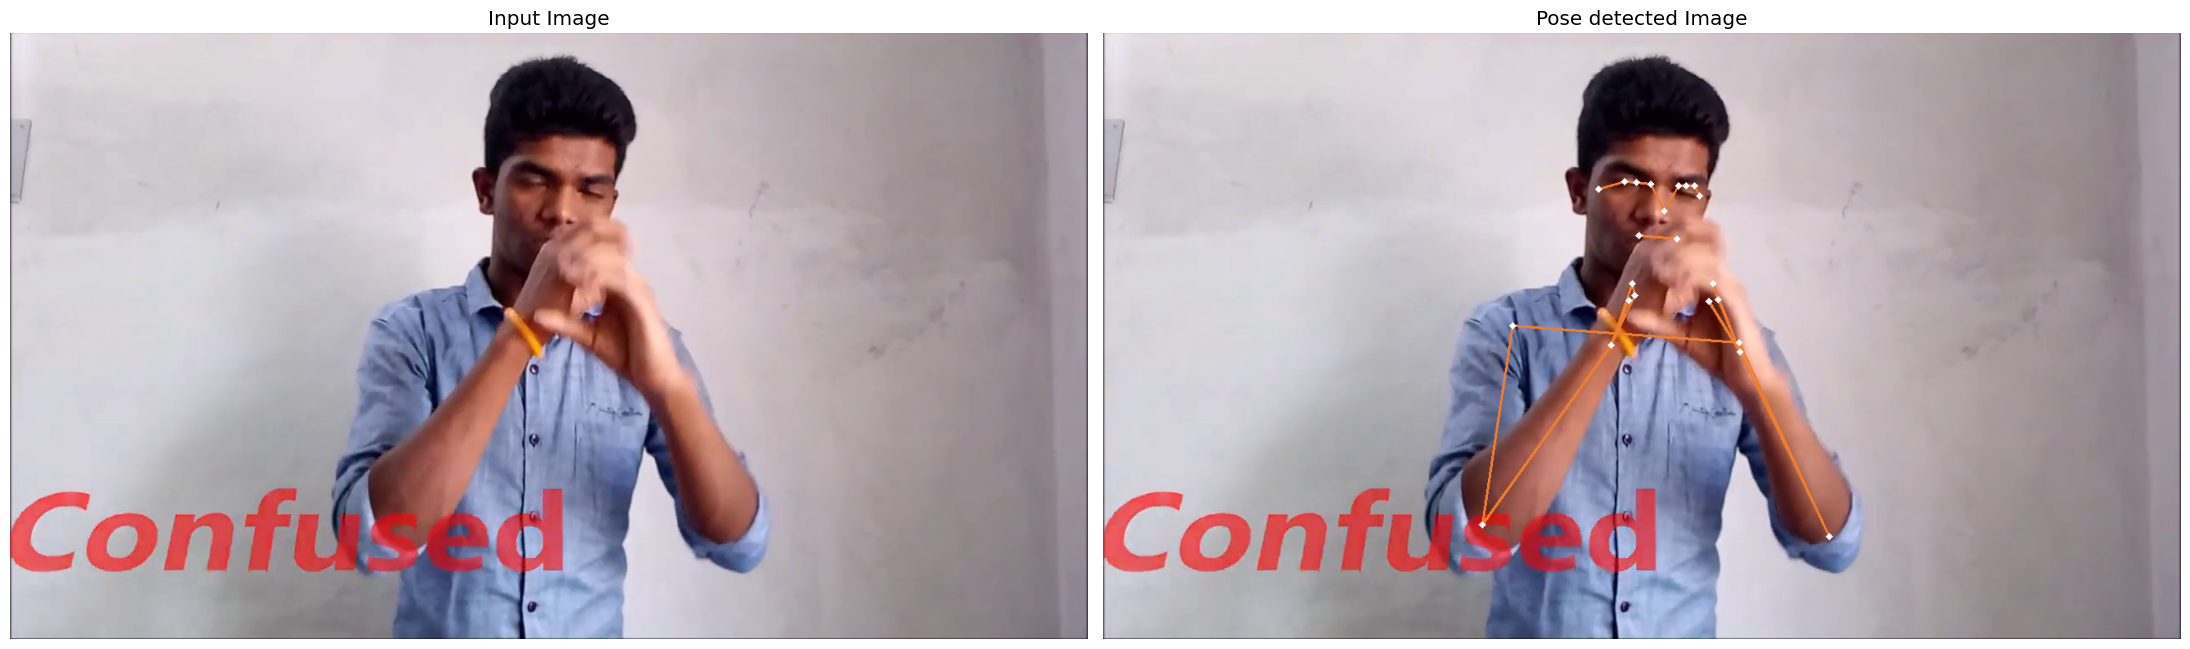

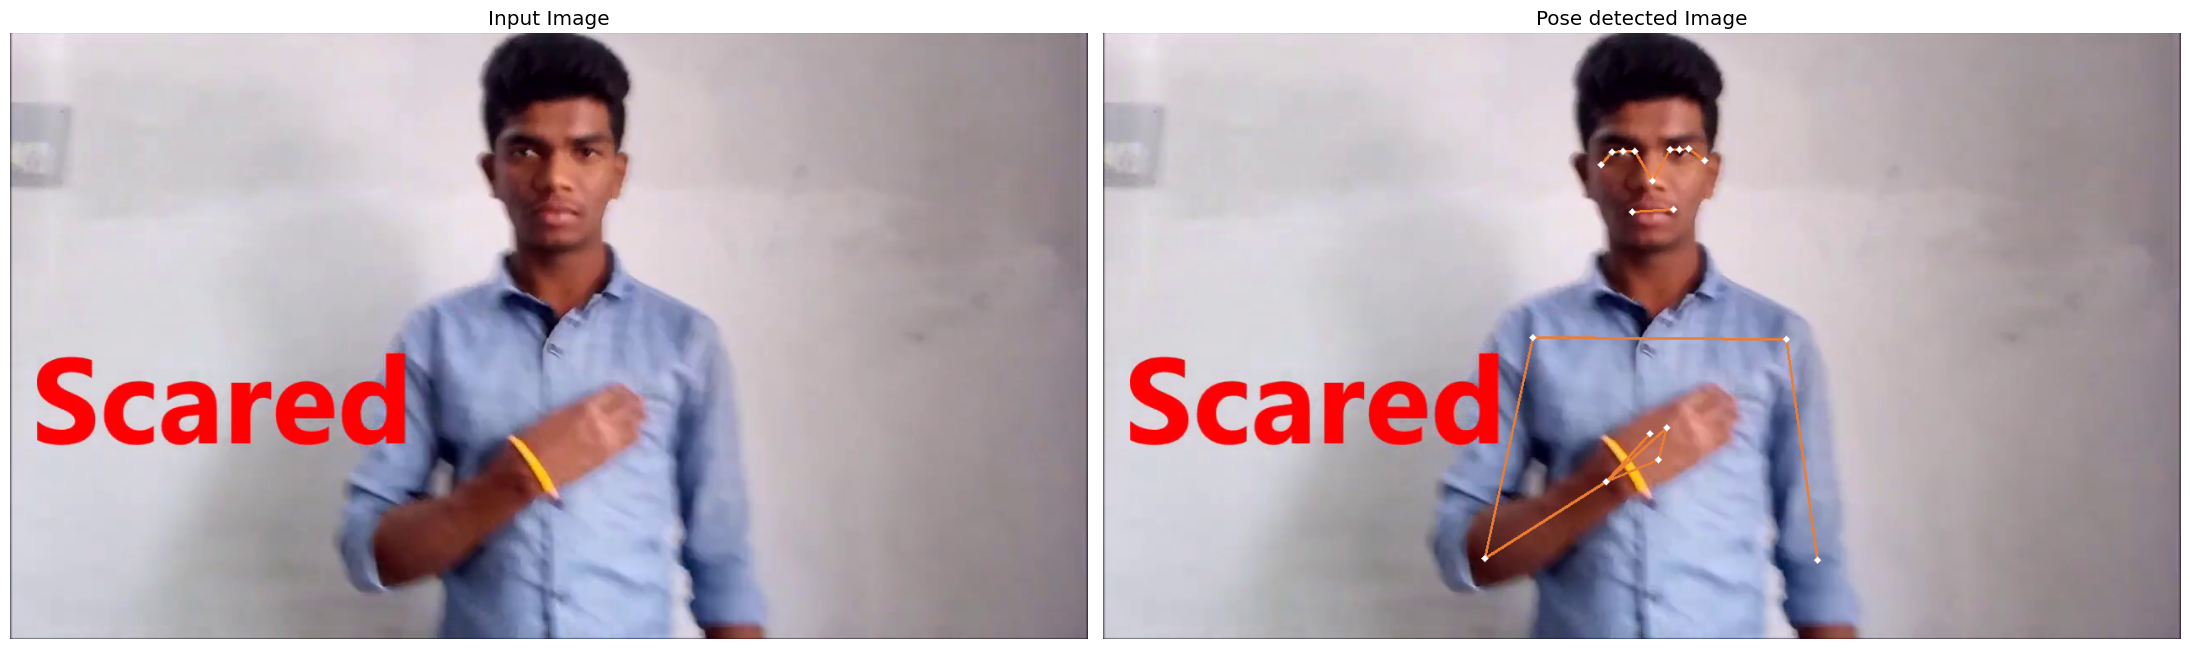

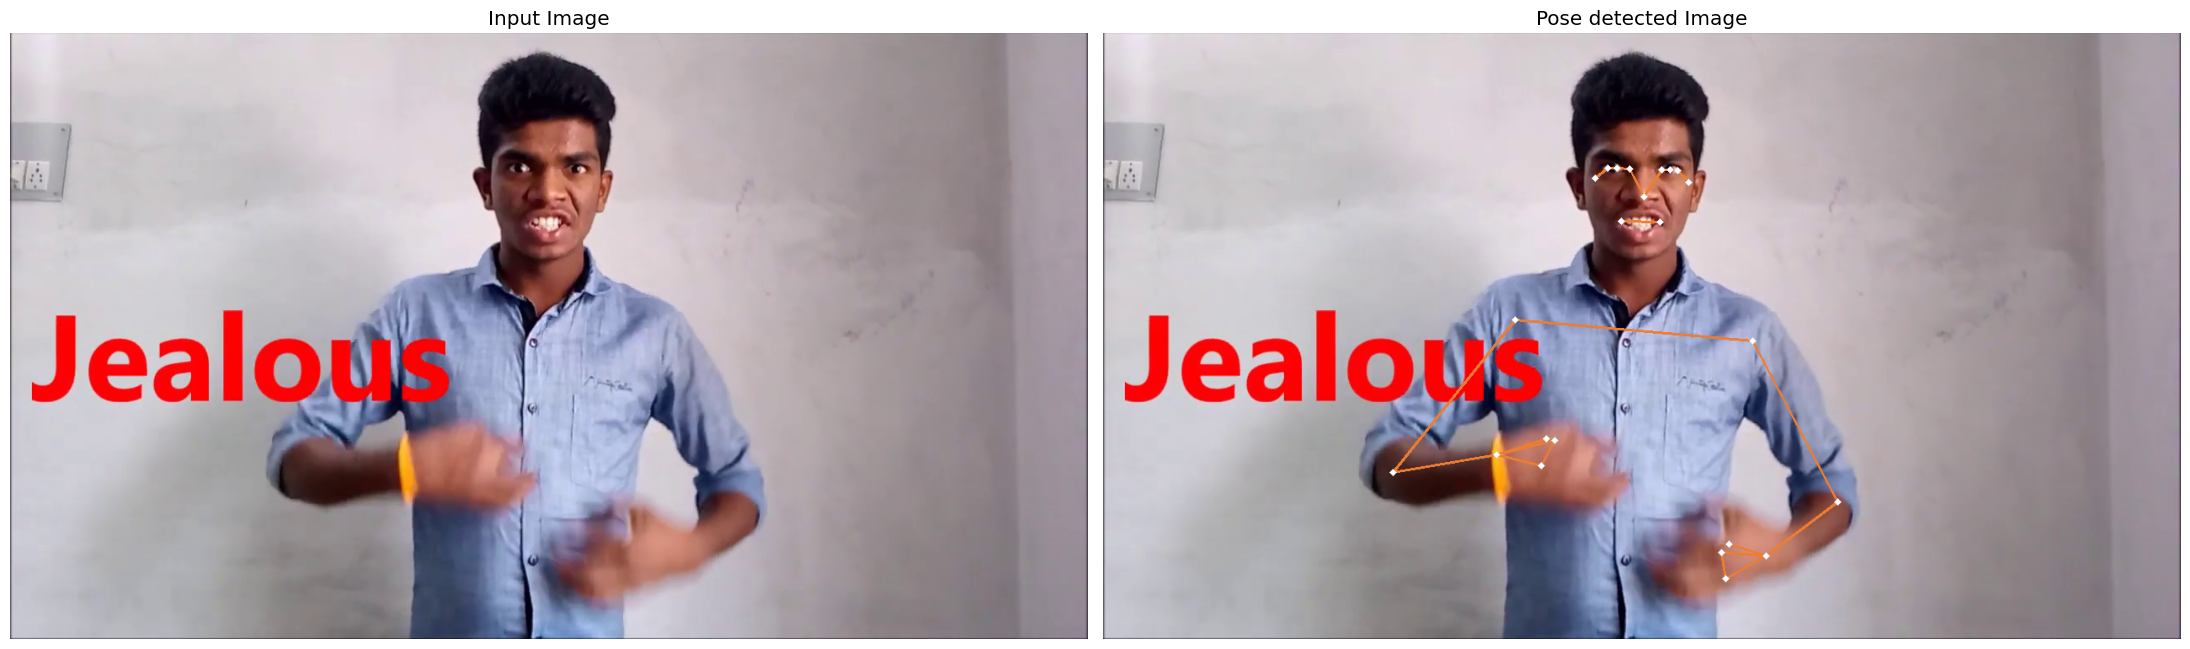

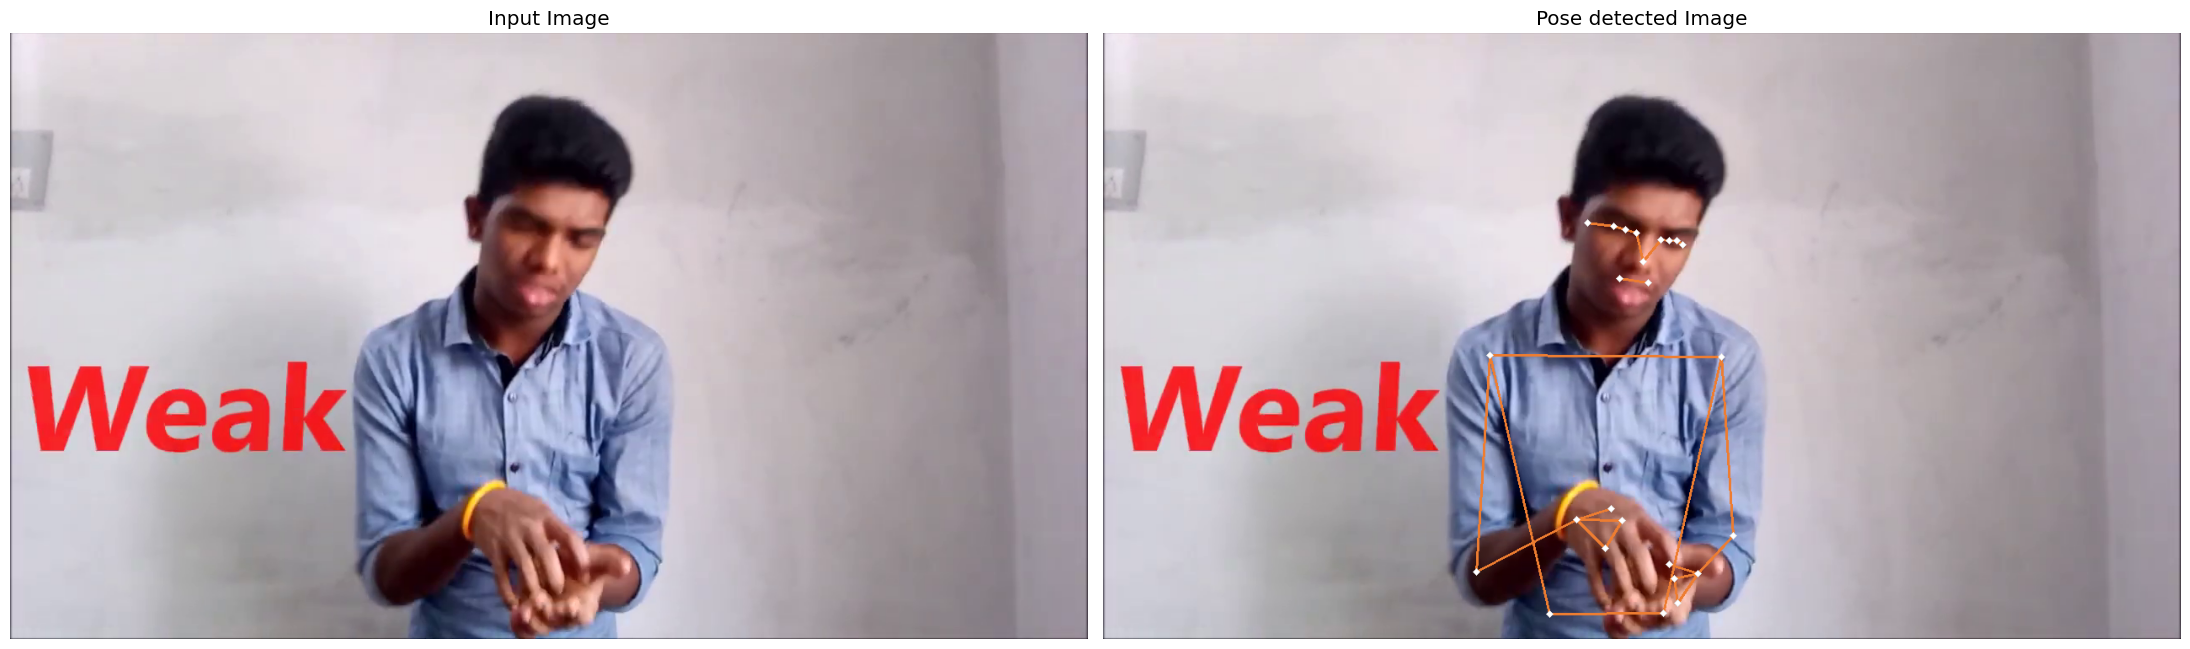

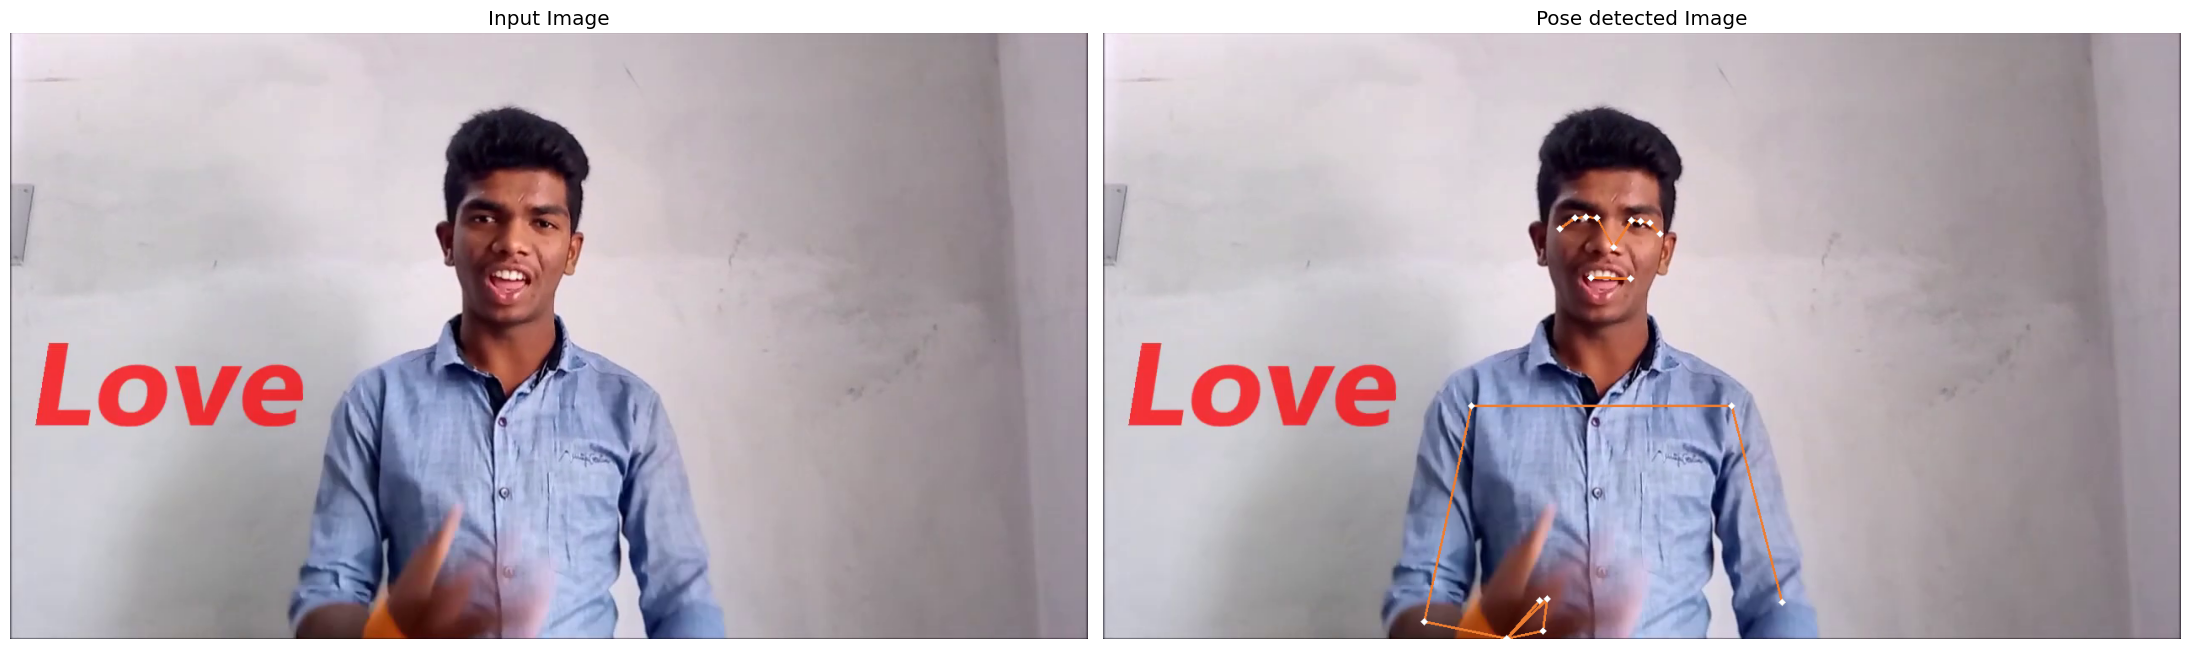

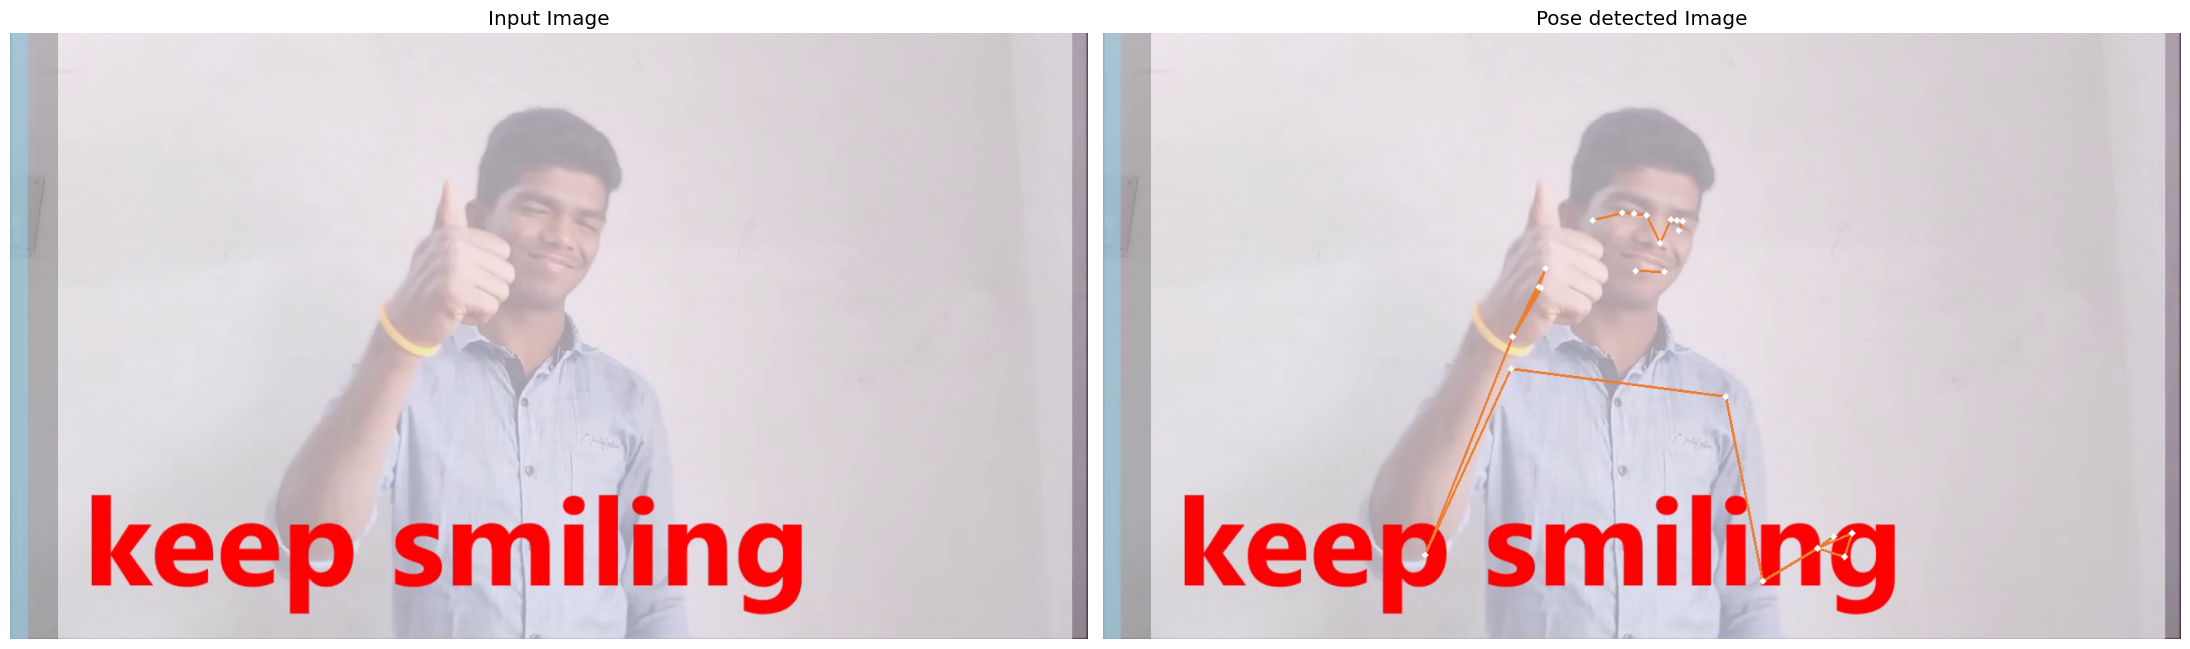

In [41]:
cap = cv2.VideoCapture("/content/Learn_Indian_Sign_Language.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#fig, axs = plt.subplots(int(n_frames / 5), 5, figsize=(30, 20))
#axs = axs.flatten()

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        detectPose(img, pose_image, draw=True, display=True)
        #axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        #axs[img_idx].set_title(f'Frame: {frame}')
        #axs[img_idx].axis('off')
        img_idx += 1


cap.release()